## Problem set 2

Luis Teles 2022

### Part 1

Do the folowing exercises from Week 1 lecture notebooks: 

- Numerical: Exercises 4-7

In addition, do the following exercises:

##### Economic setting

Demand function:

$ Q(p) = 0.5p^{-0.5}+ 0.3 p^{-0.2} $

Excess demand:

$ g(p) = 1 - 0.5p^{-0.5} - 0.3 p^{-0.2} $

Goal: for a given demanded quantity of $Q=1$, what is the price $p$ that clears the market?



In [1]:
#Imports and demand functions from previous exercises
from numpy import *
import matplotlib.pyplot as plt

def qd(p): return 0.5*(p**-0.5) + 0.3*(p**-0.2) 

def xd(p): return 1-qd(p)

def d_qd(p):  return -0.25*(p**-1.5) + -0.06*(p**-1.2) 

### Exercise 4

- First, define the derivative approximation function. This function takes three arguments: 1) a function, 2) $x_0$ and 3) precision $h= x-x_0$. The derivative approximation function is given by: $f'(x_0)= \frac{f(x_0+h)-f(x_0)}{h}$. Use $h=10^{-6}$.

- Define the Newton-Rhapson algorithm. Then use it to find the price $p$ that clears demand $Q=1$. Use tolerance $10^{-15}$ and use maximum number of iteratrions 1000 and initial guess $x_0=1$. 

In [97]:
def approx_deriv(x, f, h = 10**-6): return (f(x + h) - f(x)) / h

In [94]:
def root_NewtonRhapson(f, x0, tol = 10**-15, max_iter = 1000):
    x_n = x0
    n = 0
    gap = 1
    while (abs(gap) > tol) & (n <= max_iter):
        if n>0: x_n = x_n1
        x_n1 = x_n - f(x_n) / approx_deriv(x_n, f)
        gap = x_n1 - x_n
        n += 1
    if abs(gap) <= tol: 
        return x_n1
    else:
        print('error, did not converge')

In [23]:
root_NewtonRhapson(xd, x0 = 1)

0.5670944159657575

### Exercise 5

- Assume that the tax revenue for a government is given by $R(t)= -t^2+t$, where $t$ is the taxe rate. Use the grid search method and find the tax rate on the $[0,1]$ domain that maximizes the tax revenue up to $10^{-4}$. 

In [26]:
def revenue(t): return -t**2 + t

In [27]:
t_grid = arange(0, 1 + 10**-4, 10**-4)

revenue_space = [revenue(t) for t in t_grid]

print("The tax rate that maximizes tax revenue is", 100*max(revenue_space), "percent")

The tax rate that maximizes tax revenue is  25.0 percent


### Exercise 6

- Import scipy.optimize as opt and use the minimize method to find the optimal savings allocation. In addition, report the optimal consumption in both periods. Use initial guess $x_0=0.1$. (Hint: read the minimize documentation using help to check the arguments of this method)

In [2]:
import scipy.optimize as opt
#?opt.minimize

In [3]:
def total_utility(saving, mu, b, g, R, y):
    return ((y - saving) ** (1-mu))/(1-mu) + b * ((y + R * saving) ** (1-g))/(1-g)

In [4]:
mu_as = 1.1
b_as = 0.95
g_as = 1.2
R_as = 1.05
y_as = 10

In [5]:
optim_results = opt.minimize(lambda x: -total_utility(x, mu_as, b_as, g_as, R_as, y_as), x0 = 0.1)

optimal_saving = round(optim_results.x[0],2)

print("The optimal saving allocation is", optimal_saving)
print("This is", optimal_saving * 100 / 10, "percent of the income")

The optimal saving allocation is -0.98
This is -9.8 percent of the income


In [47]:
print("c1 =", y_as - optimal_saving)
print("c2 =", y_as + R_as * optimal_saving)
print("total cons", y_as - optimal_saving + y_as + R_as * optimal_saving)

c1 = 10.98
c2 = 8.971
total cons 19.951


### Exercise 7

- Build a function that returns an array with two elements, i.e. the residuals of the first order conditions for given $c_1, c_2$.

- Use the fsolve to get the optimal allocations, i.e. the ones that make the first order conditions zero.

In [49]:
def opt_cond_res(C, mu = mu_as, b = b_as, g = g_as, R = R_as, y = y_as):
    res_Euler = (C[0] ** -mu) - b * R * (C[1] ** -g)
    res_BC    = C[0] + C[1] / R - (1 + 1/R) * y
    return res_Euler, res_BC

In [56]:
optim_sol = opt.fsolve(opt_cond_res, x0 = array([5,10]))

print("The optimal allocation is:")
print("c1 = ", round(optim_sol[0],3))
print("c2 = ", round(optim_sol[1],3))
print("total cons = ", round(optim_sol[0] + optim_sol[1],3))

The optimal allocation is:
c1 =  10.978
c2 =  8.973
total cons =  19.951


### part 2

#### 1. Gaussian Log-Likelihood Estimation

In [58]:
import numpy as np

# Lets define the Gaussian Log-likelihood function
def lgauss(mu, sigma, n, x):
    '''
    This function evaluates the gaussian log-likelihood given mu, sigma,
    number of observations, n, and a dataset, x.
    
    Returns: a scalar
    '''
    
    l = -n/2*np.log(2*np.pi*sigma**2) -1/(2*sigma**2)*(sum((x-mu)**2))
    return l

In [63]:
# Next, lets import data on housing prices in Boston
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data[:,0]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

A. Evaluate the log-likelihood with mu=5, sigma=1 and with Boston data.

In [86]:
lgauss(mu = 5, sigma = 1, n = len(data), x = data)

-19632.940075376966

B. Given sigma, find $\mu$ that maximizes lgauss by minimizing -lgauss. (use `fmin` from `scipy.optimize`)

In [92]:
# Given sigma = 1?

In [103]:
opt.fmin(lambda mu: -lgauss(mu, 1, len(data), data), x0 = 1, disp = 0)[0]

3.613476562500005

C. Now use the Newton-Rhapson Method you defined in exercise 4 of the numerical lecture notebook.

In [102]:
root_NewtonRhapson(
    # Newton-Rhapson is to find the root of a function. Here we want to minimize the LL.
    # Quick fix: use the DAF to compute numerically the LL derivative.
    lambda mu: approx_deriv(mu, 
                            lambda x: -lgauss(x, sigma = 1, n=len(data), x=data))
    , x0 = 5)

3.6135230526029236

D. Estimate both $\mu$ and $\sigma$.

In [110]:
mu_sig_results = opt.fmin(lambda mu_sig: -lgauss(mu_sig[0], mu_sig[1], len(data), data), x0 = (2,3), disp = 0)
print('mu_hat =', round(mu_sig_results[0], 3))
print('sig_hat =', round(mu_sig_results[1], 3))



mu_hat = 3.614
sig_hat = 8.593


E. Plot the 3D log-likelihood function. (you should see a preety flat surface with a tiny peak) 

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [129]:
mu_space = np.arange(-5,15,1e-1)
sig_space = np.arange(1,15,1e-1)
LL_space = array([[lgauss(x, y, len(data), data) for x in mu_space] 
                  for y in sig_space])

Text(0.5, 0, '$LL$')

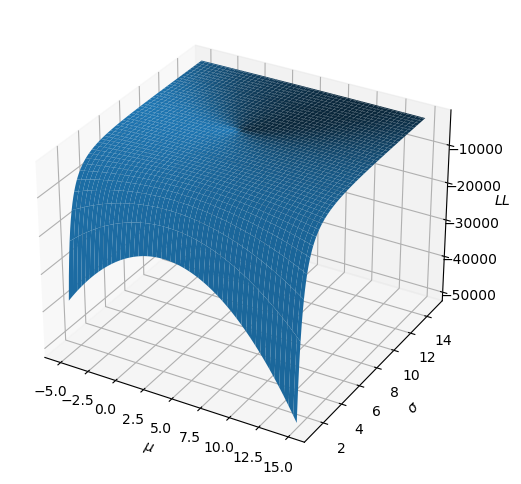

In [130]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(projection='3d')
X, Y = meshgrid(mu_space, sig_space)
p = ax.plot_surface(X, Y, LL_space)
        
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$LL$')

#### 2. Function Approximation

Let's approximate the following function:

$$ f(x) = \min (\sin(x), 0.7) $$

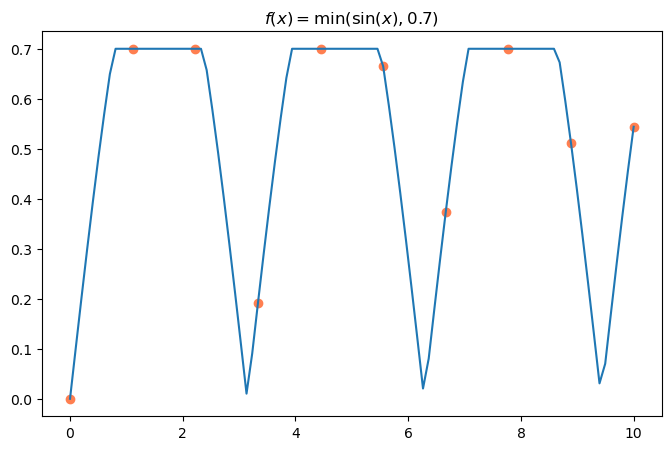

In [132]:
def fun(x):
    res = []
    for i in x:
        res.append(min(abs(np.sin(i)), 0.7))
    return res

x = np.linspace(0,10,100)
data_x = np.linspace(0,10,10) 

plt.figure(figsize=(8,5))
plt.plot(x, fun(x))
plt.scatter(data_x, fun(data_x), c = 'coral')
plt.title(r'$f(x) = \min (\sin(x), 0.7)$') # r before the title string calls latex
plt.show()

In [133]:
data_Fx = fun(x)

A. Compute the linear interpolation approximation of the function and plot it.

In [134]:
import scipy.interpolate as interp # Main interpolation library in Python

In [138]:
data_Fx_pts = fun(data_x)

lin_approx_F = interp.interp1d(data_x, data_Fx_pts, kind = 'linear')

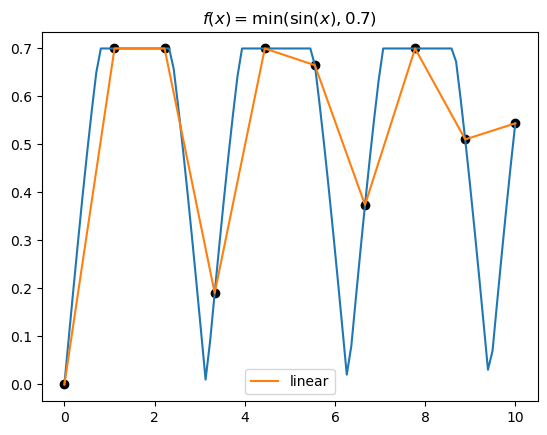

In [159]:
data_lin_approx = lin_approx_F(x)

fig, ax = plt.subplots(1,1)
ax.plot(x, data_Fx)
ax.plot(x, data_lin_approx, label = 'linear')
ax.scatter(data_x, data_Fx_pts, c = 'black')
ax.set_title(r'$f(x) = \min (\sin(x), 0.7)$') # r before the title string calls latex
ax.legend()

B. Repeat with a cubic spline and with the Chebyshev polynomials (use 6). 

In [144]:
splrep_F = interp.splrep(data_x, data_Fx_pts)
data_splrep = interp.splev(x ,splrep_F)

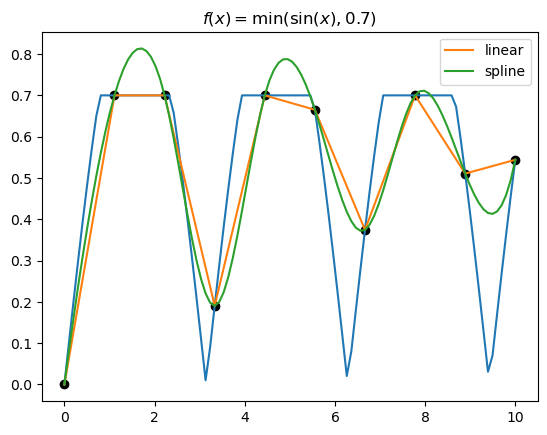

In [160]:
ax.plot(x, data_splrep, label = 'spline')
ax.legend()
fig

In [164]:
cheb_coefs_F = np.polynomial.chebyshev.chebfit(data_x, data_Fx_pts, deg = 6)
data_cheb = np.polynomial.chebyshev.chebval(x, cheb_coefs_F)

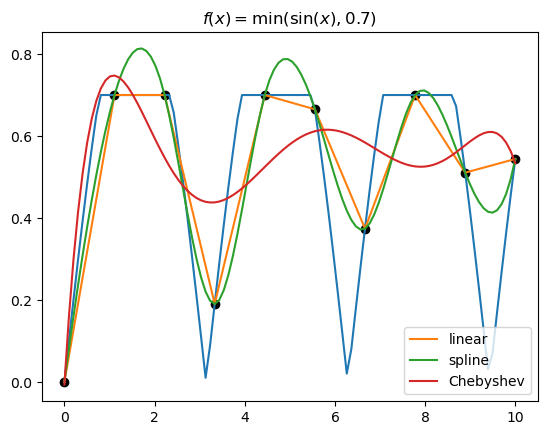

In [165]:
ax.plot(x, data_cheb, label = 'Chebyshev')
ax.legend()
fig

C. Define the approximation error.

In [166]:
Errors_linear = data_Fx - data_lin_approx
Errors_spline = data_Fx - data_splrep
Errors_chebys = data_Fx - data_cheb

D. Plot the approximation error for all three types of approximations in the same figure to compare them.

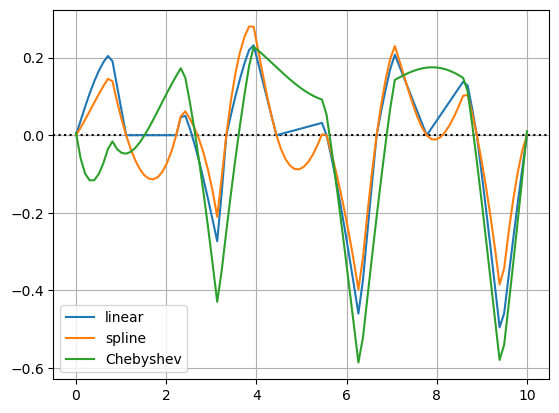

In [180]:
fig, ax = plt.subplots(1,1)
ax.axhline(0, c = 'black', linestyle = 'dotted')
ax.plot(x, Errors_linear, label = 'linear')
ax.plot(x, Errors_spline, label = 'spline')
ax.plot(x, Errors_chebys, label = 'Chebyshev')
ax.grid()
ax.legend()

E. Which approximation delivers the lowest approximation error?

In [181]:
print('Sum of absolute errors:')
print('Linear:',sum([abs(x) for x in Errors_linear]))
print('Spline:',sum([abs(x) for x in Errors_spline]))
print('Chebyshev:',sum([abs(x) for x in Errors_chebys]))

Sum of absolute errors:
Linear: 11.25802181600246
Spline: 10.556488542616757
Chebyshev: 16.773126607181844


- Spline smaller sum of absolute errors over x

In [182]:
print('Sum of squared errors:')
print('Linear:',sum([x**2 for x in Errors_linear]))
print('Spline:',sum([x**2 for x in Errors_spline]))
print('Chebyshev:',sum([x**2 for x in Errors_chebys]))

Sum of squared errors:
Linear: 2.63182394944195
Spline: 1.9823699240623875
Chebyshev: 4.60032986440248


- Spline smaller sum of squared errors